In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Configuración estética
sns.set(style="whitegrid")


In [10]:
# Valores de determinación del presupuesto
materiales = 5000
mano_obra = 3000
transporte = 1000
administrativos = 1500

# Total de Determinación
costo_total = materiales + mano_obra + transporte + administrativos
print(f"Costo total determinístico: ${costo_total}")



Costo total determinístico: $10500


In [11]:
# Parámetros
np.random.seed(42)
N = 5000  # número de simulaciones

# Distribuciones
materiales_dist = np.random.normal(loc=5000, scale=500, size=N)          # Normal
mano_obra_dist = np.random.lognormal(mean=np.log(3000), sigma=0.2, size=N) # Log-Normal
transporte_dist = np.random.chisquare(df=4, size=N) * 250                 # Chi-cuadrada escalada
administrativos_dist = np.random.exponential(scale=1500, size=N)          # Exponencial


In [12]:
# Costo total para simulaciones
costo_simulado = materiales_dist + mano_obra_dist + transporte_dist + administrativos_dist

# DataFrame para análisis
df_simulacion = pd.DataFrame({
    'Materiales': materiales_dist,
    'Mano_Obra': mano_obra_dist,
    'Transporte': transporte_dist,
    'Administrativos': administrativos_dist,
    'Total': costo_simulado
})

df_simulacion.describe()


,Materiales,Mano_Obra,Transporte,Administrativos,Total
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5002.800965,3055.903425,1009.095722,1448.368454,10516.168566
std,498.239914,624.895800,700.705061,1453.659102,1815.905694
min,3379.366330,1369.070768,6.773022,0.165357,6163.410844
25%,4671.047481,2615.082664,492.251273,421.423968,9253.762971
50%,5006.732796,2989.547946,843.973362,1015.926454,10213.826009
75%,5333.005304,3435.147638,1359.952493,1967.491602,11398.468855
max,6963.118853,6076.466299,6847.329383,12145.797996,22778.854301


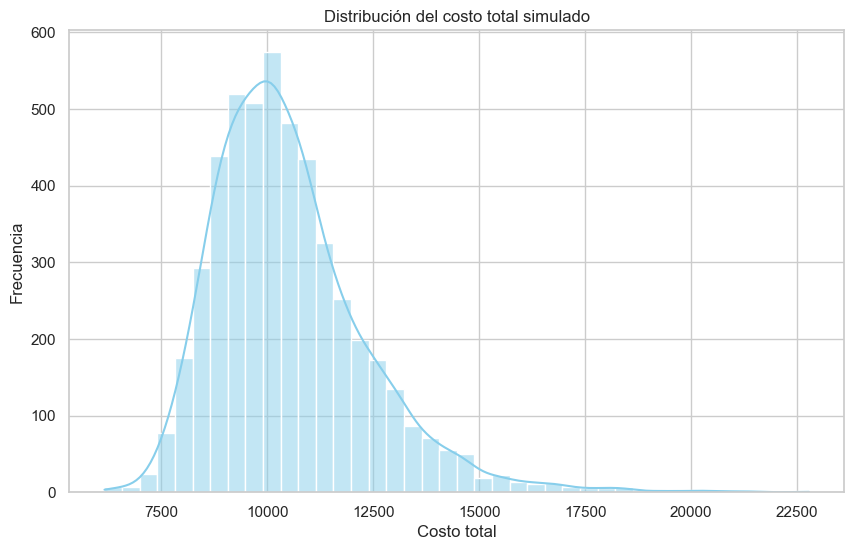

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df_simulacion['Total'], kde=True, color="skyblue", bins=40)
plt.title("Distribución del costo total simulado")
plt.xlabel("Costo total")
plt.ylabel("Frecuencia")
plt.show()



In [14]:
# Percentiles
p5 = np.percentile(costo_simulado, 5)
p50 = np.percentile(costo_simulado, 50)
p95 = np.percentile(costo_simulado, 95)

print(f"Percentil 5%: ${p5:.2f}")
print(f"Mediana (50%): ${p50:.2f}")
print(f"Percentil 95%: ${p95:.2f}")


Percentil 5%: $8163.57
Mediana (50%): $10213.83
Percentil 95%: $13838.34


El 90% de las veces, el costo total estará entre P5 y P95.
La mediana indica un valor central esperado.

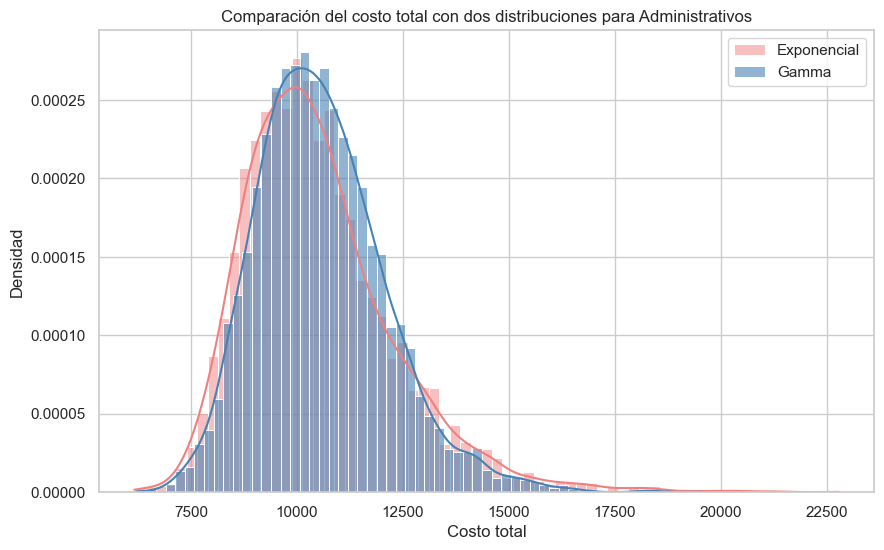

In [15]:
administrativos_gamma = np.random.gamma(shape=2, scale=750, size=N)
costo_simulado_gamma = materiales_dist + mano_obra_dist + transporte_dist + administrativos_gamma

plt.figure(figsize=(10,6))
sns.histplot(costo_simulado, color="lightcoral", label="Exponencial", kde=True, stat="density")
sns.histplot(costo_simulado_gamma, color="steelblue", label="Gamma", kde=True, stat="density", alpha=0.6)
plt.title("Comparación del costo total con dos distribuciones para Administrativos")
plt.xlabel("Costo total")
plt.ylabel("Densidad")
plt.legend()
plt.show()


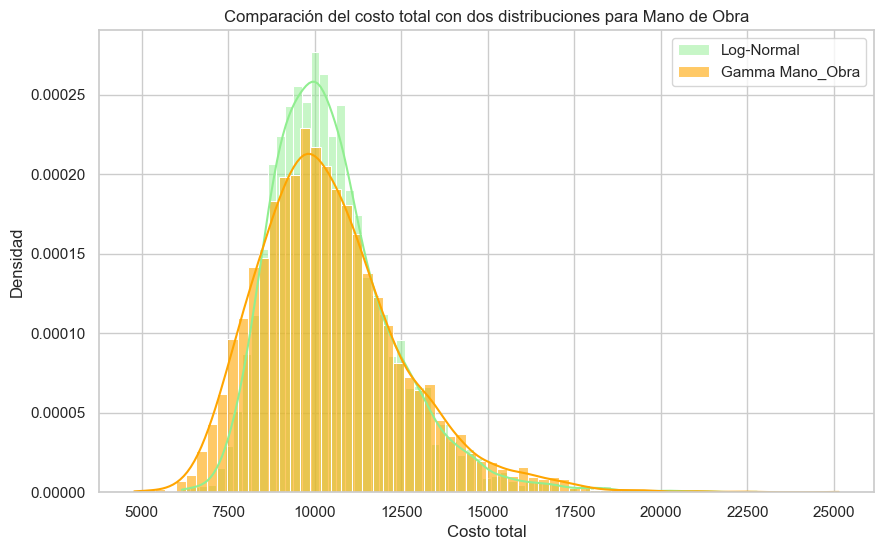

In [16]:
mano_obra_gamma = np.random.gamma(shape=6, scale=500, size=N)
costo_simulado_gamma2 = materiales_dist + mano_obra_gamma + transporte_dist + administrativos_dist

plt.figure(figsize=(10,6))
sns.histplot(costo_simulado, color="lightgreen", label="Log-Normal", kde=True, stat="density")
sns.histplot(costo_simulado_gamma2, color="orange", label="Gamma Mano_Obra", kde=True, stat="density", alpha=0.6)
plt.title("Comparación del costo total con dos distribuciones para Mano de Obra")
plt.xlabel("Costo total")
plt.ylabel("Densidad")
plt.legend()
plt.show()


La incertidumbre introducida por diferentes distribuciones cambia la forma curva del costo total. mientras que el percentil 95% sirve para establecer un presupuesto conservador, mientras el 50% da más a lo anticipado.
La modelación gamma nos muestra colas mas largas, elevando la probabilidad de altos costos, Lo que permite llegar a tomar decisiones financieras más claras y evitando riesgos.